In [629]:
#CSCI 183 Final Project
#Jack Corley, Savannah Balistreri, Lauren Vu 
#Imported libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

#Visualize data

resumes = pd.read_csv('resume.csv')
resumes.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


In [630]:
# #Dropping all the columns one by one because this code hates me
# resume = resumes.drop(['job_ad_id'], axis=1)
# resume = resume.drop(['job_city'], axis=1)
# resume = resume.drop(['job_req_computer'], axis=1)
# resume = resume.drop(['job_req_school'], axis=1)
# resume = resume.drop(['firstname'], axis=1)
# resume = resume.drop(['honors'], axis=1)
# resume = resume.drop(['computer_skills'], axis=1)
# resume = resume.drop(['special_skills'], axis=1)
# resume = resume.drop(['volunteer'], axis=1)
# resume = resume.drop(['job_req_min_experience'], axis=1) #dropped because it's 56% NaN values :(
# resume = resume.drop(['job_fed_contractor'], axis=1) #dropped because it's 36% NaN values :(

resume = resumes

if resume.isna().sum().sum() > 0:
    for column in resume.columns:
        # Check if the column is numerical (float or int)
        if resume[column].dtype == 'float64' or resume[column].dtype == 'int64':
            resume[column].fillna(resume[column].mean(), inplace=True)
        # Else, assume the column is categorical and fill with mode
        else:
            resume[column].fillna(resume[column].mode()[0], inplace=True)
resume.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,0.114765,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,0.114765,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,0.114765,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,0.114765,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.000000,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


In [631]:
#One-hot encoding data

# one-hot encode the categorical columns
categorical_columns = resume.select_dtypes(include=['object']).columns
encoded = pd.get_dummies(resume, columns=categorical_columns)
encoded_columns = encoded.columns

encoded.head()

,job_ad_id,job_fed_contractor,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_computer,job_req_organization,received_callback,years_college,...,firstname_Tanisha,firstname_Todd,firstname_Tremayne,firstname_Tyrone,race_black,race_white,gender_f,gender_m,resume_quality_high,resume_quality_low
0,384,0.114765,1,1,0,0,1,0,0,4,...,False,False,False,False,False,True,True,False,False,True
1,384,0.114765,1,1,0,0,1,0,0,3,...,False,False,False,False,False,True,True,False,True,False
2,384,0.114765,1,1,0,0,1,0,0,4,...,False,False,False,False,True,False,True,False,False,True
3,384,0.114765,1,1,0,0,1,0,0,3,...,False,False,False,False,True,False,True,False,True,False
4,385,0.000000,1,1,0,0,1,1,0,3,...,False,False,False,False,False,True,True,False,True,False


c:\Users\Jack\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jack\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jack\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jack\AppData\Local\Pro

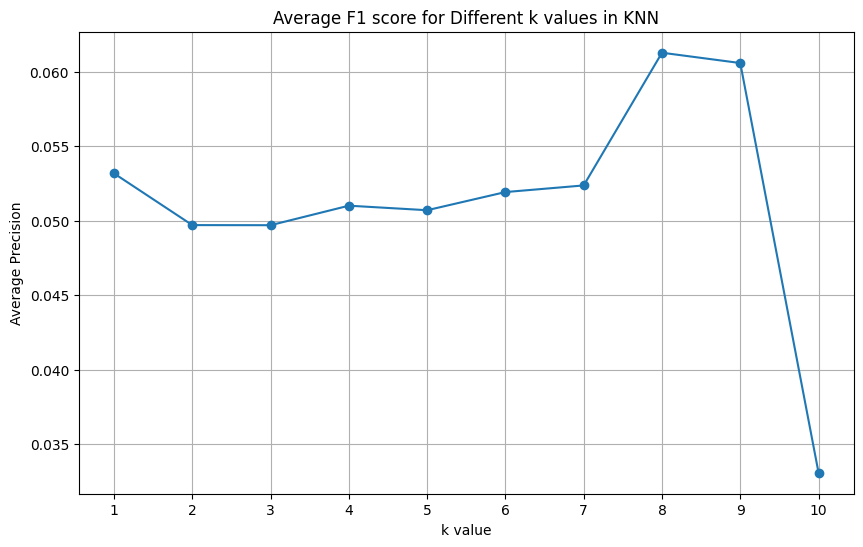

In [632]:
#Create X columns and Y column
x= encoded.drop(['received_callback'], axis=1)
y= encoded['received_callback']

#Split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

k_values = range(1, 11)
average_precisions = []

# Iterate over k values and use cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Use cross-validation to evaluate precision
    precision_scores = cross_val_score(knn, x, y, cv=5, scoring='precision')
    average_precision = precision_scores.mean()
    average_precisions.append(average_precision)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_precisions, marker='o')
plt.xlabel('k value')
plt.ylabel('Average Precision')
plt.title('Average F1 score for Different k values in KNN')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Implement k-nn from sklearn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

#Predictions
predictions = knn.predict(x_test)

In [633]:
#All the accuracy scores but it doesn't work - "Classification metrics can't handle a mix of continuous and binary targets"
print('Accuracy: ', accuracy_score(predictions, y_test))
print('Precision: ', precision_score(predictions, y_test))
print('Recall: ', recall_score(predictions, y_test))
print('F1: ', f1_score(predictions, y_test))
print("Confusion Matrix:")
print(confusion_matrix(predictions, y_test))

Accuracy:  0.9158110882956879
Precision:  0.024793388429752067
Recall:  0.375
F1:  0.046511627906976744
Confusion Matrix:
[[1335  118]
 [   5    3]]


In [634]:
# Now run the test files on the model

new_data = pd.read_csv('resume.csv')

if new_data.isna().sum().sum() > 0:
    for column in new_data.columns:
        if new_data[column].dtype == 'float64' or new_data[column].dtype == 'int64':
            new_data[column].fillna(new_data[column].mean(), inplace=True)
        else:
            new_data[column].fillna(new_data[column].mode()[0], inplace=True)

new_data_encoded = pd.get_dummies(new_data, columns=categorical_columns)
new_data_aligned = new_data_encoded.reindex(columns=encoded_columns, fill_value=0).drop('received_callback', axis=1)
new_predictions = knn.predict(new_data_aligned)

y_new = new_data['received_callback']

conf_matrix = confusion_matrix(y_new, new_predictions)

tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

print("\nTrue Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

print('Accuracy: ', accuracy_score(y_new, new_predictions))
print('Precision: ', precision_score(y_new, new_predictions))
print('Recall: ', recall_score(y_new, new_predictions))
print('F1: ', f1_score(y_new, new_predictions))
print("Confusion Matrix:")
print(conf_matrix)



True Positives (TP): 11
True Negatives (TN): 4467
False Positives (FP): 11
False Negatives (FN): 381
Accuracy:  0.9195071868583162
Precision:  0.5
Recall:  0.02806122448979592
F1:  0.053140096618357495
Confusion Matrix:
[[4467   11]
 [ 381   11]]


In [635]:
# Now run the test files on the model

new_data = pd.read_csv('clones/all_black_women_resume.csv')

if new_data.isna().sum().sum() > 0:
    for column in new_data.columns:
        if new_data[column].dtype == 'float64' or new_data[column].dtype == 'int64':
            new_data[column].fillna(new_data[column].mean(), inplace=True)
        else:
            new_data[column].fillna(new_data[column].mode()[0], inplace=True)

new_data_encoded = pd.get_dummies(new_data, columns=categorical_columns)
new_data_aligned = new_data_encoded.reindex(columns=encoded_columns, fill_value=0).drop('received_callback', axis=1)
new_predictions = knn.predict(new_data_aligned)

y_new = new_data['received_callback']

conf_matrix = confusion_matrix(y_new, new_predictions)

tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

print("\nTrue Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

print('Accuracy: ', accuracy_score(y_new, new_predictions))
print('Precision: ', precision_score(y_new, new_predictions))
print('Recall: ', recall_score(y_new, new_predictions))
print('F1: ', f1_score(y_new, new_predictions))
print("Confusion Matrix:")
print(conf_matrix)



True Positives (TP): 11
True Negatives (TN): 4466
False Positives (FP): 12
False Negatives (FN): 381
Accuracy:  0.9193018480492813
Precision:  0.4782608695652174
Recall:  0.02806122448979592
F1:  0.05301204819277109
Confusion Matrix:
[[4466   12]
 [ 381   11]]
